In [1]:
it=1 # Auxiliary variable (to avoid overwriting on output files)

1

In [2]:
using DifferentialEquations, Plots, Interact # libraries

WebIO._IJuliaInit()

In [3]:
it=it+1  
N=100  # Total number of individuals
indexN = 4*N
invN=1/N
pot_fact=N  # factor multiplying the interaction potential
end_time = 70 # Final time for the simulation

# Parameters of the model [α, β, R]
parmsMills = [1.6,0.5,4] 

# CHOOSE ONE INITIAL DATA
parms = deepcopy(parmsMills)

vDes = sqrt(parms[1]/parms[2]) #desired velocity √α/β

println("Parameters")
println("N=$N")
println("Final time = $end_time")
println("α=$(parms[1])")
println("β=$(parms[2])")
println("R=$(parms[3])")

Parameters
N=100
Final time = 70
α=1.6
β=0.5
R=4.0


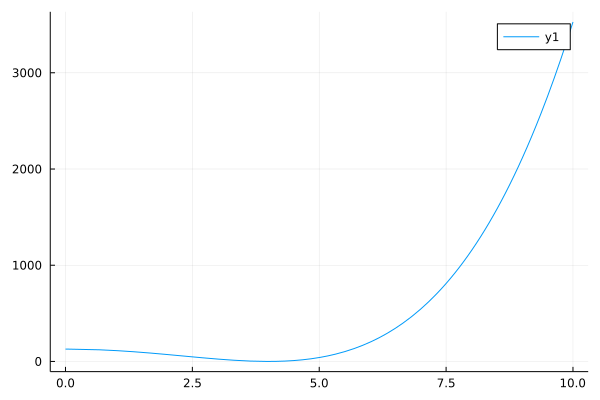

In [13]:
function Potential(r,parms)
    return (r^2-parms[3]^2)^2/2#-parms[3]^4/2
end

plot(r->Potential(r,parms), xlims=[0,10])

In [8]:
function normv(u1,u2) 
   return (u1^2+u2^2) 
end

function PotGradient(r,parms) # The gradient of the interaction potential U(r) w.r.t r
    R = parms[3]
    return 2*r*(r^2-R^2)
end

function TotPotential(u,index,p) # Total interaction potential
    # compute ∑ⱼ ∇ᵢ U(|Xᵢ-Xⱼ|)
    pot =[0,0] 
    coord =[u[index],u[index+1]] # =Xᵢ (position of particle 'i')
    for j=1:4:indexN # run over all the particles
        if j!=index
            coordj = [u[j],u[j+1]] # =Xⱼ (position of particle 'j')
            v=[coord[1]-coordj[1],coord[2]-coordj[2]] # = Xᵢ-Xⱼ
            dist = √normv(v[1],v[2]) # =|Xᵢ-Xⱼ|
            if dist>1e-8
                pot = pot + (PotGradient(dist,p).*v)./dist  #DANGER! when dist is very small, this can give numerical error
            end
        end
    end
    return pot
end

TotPotential (generic function with 1 method)

In [9]:
function ZOR!(du,u,p,t)
    #α=p[1]
    #β=p[2]
    for i=1:4:indexN
        norm = normv(u[i+2],u[i+3]) # = |Vᵢ|²
        #rel_speed = α-β*norm # friction term
        du[i]=u[i+2]   # dX_i/dt =V_i (first component)
        du[i+1] =u[i+3]  # dX_i/dt = V_i (second component)
        pot_aux =(pot_fact*invN).*TotPotential(u,i,p)  # κ *∇ᵢU/N (Xᵢ)
        #du[i+2]= rel_speed*u[i+2]-pot_aux[1]
        #du[i+3]= rel_speed*u[i+3]-pot_aux[2]
        du[i+2]= -pot_aux[1]
        du[i+3]= -pot_aux[2]
    end
end

ZOR! (generic function with 1 method)

In [11]:
pm = parms[3]^(1/2)
u_init=zeros(4*N)

# initialisation of the positions
 #side = floor(√N )+1
for i=1:4:indexN
    u_init[i]=(rand()-0.5)*2*pm  #((i/4)÷side)*pm*2
    u_init[i+1]=(rand()-0.5)*2*pm #(i/4)%side*pm*2
end
# initialisation of the velocities
for i=1:4:indexN
    u_init[i+2]=(rand()-0.5)*vDes*0.01
    u_init[i+3]=(rand()-0.5)*vDes*0.01
end

In [13]:
probCS = ODEProblem(ZOR!,u_init,(0.0,end_time),parms)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 70.0)
u0: 400-element Vector{Float64}:
 -0.6162147395910327
  1.530765537620474
  0.0035875924947669988
  0.004030738335400239
  1.1561664325232024
  1.3232523614401313
 -0.008491419917280484
  0.0011383415959684772
  1.253466117931025
 -1.000495700775219
 -0.0018824339952860831
  0.0053080492280159165
  1.8748420093991176
  ⋮
  0.37673411863334527
  0.19898960175162417
  0.002761331542244336
 -0.0066524276969951515
  0.6550994968371673
 -0.2515945911336144
  0.003069958244827041
 -0.008087130701306438
 -0.20227998507698963
 -0.17041650413201248
 -0.00655682468690751
 -0.0010035785377374964

In [15]:
solCS =solve(probCS)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, 3rd order Hermite
t: 5792-element Vector{Float64}:
  0.0
  2.443987084604796e-6
  2.6883857930652752e-5
  0.0002712825663911323
  0.0017089381568645453
  0.00486538242180327
  0.009468560102805546
  0.015327072576122938
  0.022783707777768655
  0.03130744273528432
  0.03971042085056938
  0.048862669825172
  0.057519789723771655
  ⋮
 69.87893156520292
 69.89036540715425
 69.9033039407537
 69.91384538681714
 69.92507185743483
 69.93688537418682
 69.94818012324744
 69.95915512731712
 69.97137026267413
 69.98192444922988
 69.99288970609443
 70.0
u: 5792-element Vector{Vector{Float64}}:
 [-0.6162147395910327, 1.530765537620474, 0.0035875924947669988, 0.004030738335400239, 1.1561664325232024, 1.3232523614401313, -0.008491419917280484, 0.0011383415959684772, 1.253466117931025, -1.000495700775219  …  0.002761331542244336, -0.0066524276969951515, 0.6550994968371673, -0.2515945911336144, 0.003069958244827041, -0.00808713

In [16]:
using Plots
gr()

mpCS =@manipulate throttle = 0.1 for 
    time = slider(0.0:0.1:end_time, value = 0, label = "time")
    s = solCS(time)
    x=[]
    y=[]
    u=[]
    v=[]
    for i=1:4:indexN
        append!(x,s[i])
        append!(y,s[i+1])
        append!(u,s[i+2])
        append!(v,s[i+3])
    end
    scatter(x,y)
    quiver!(x,y,quiver=(u,v))

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["time"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 701, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/luciamarchionne/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/luciamarchionne/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/luciamarchionne/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/luciamarchionne/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/luciamarchionne/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000141e4d3c0, Task (runnable) @0x0000000141e4d3c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\",\"1.5\",\"1.6\",\"1.7\",\"1.8\",\"1.9\",\"2.0\",\"2.1\",\"2.2\",\"2.3\",\"2.4\",\"2.5\",\"2.6\",\"2.7\",